## Least Squares Regression

### Linear Functions

#### Let's start with the most basic form, $y = \beta x$    
##### For format $y = \beta x$ , define $\beta = 3$ 

In [11]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

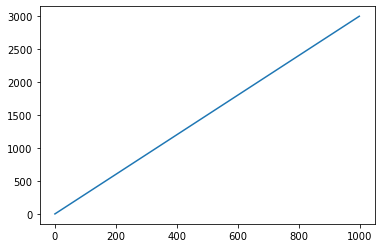

In [12]:
N = 1000 # number of points
x = np.arange(N)
y = 3*x
plt.plot(x,y)

#### Now we have this line $y = 3x$   
#### Let's plot some random points around it, and try to use those points to find the line of best fit.

In [13]:
np.random.seed(3)
mean = 0
std_deviation = 50
noise = np.random.normal(mean, std_deviation, N) #generates random noise around y values

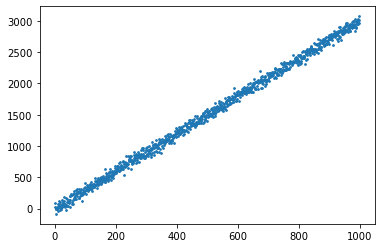

In [14]:
y_noise = y + noise
plt.scatter(x,y_noise, s = 3)

#### Cool! Let's get deriving. For matrix form $AX = b$, we have formula to find coefficient vector $X$ through    
   $(A^TA)^{-1}A^Tb$   
   
#### $b$ holds our y values, A holds our x values, and X holds the coefficient $\beta$ we're trying to find

In [15]:
b = y_noise
A = np.zeros((1000,1))
A[:,0] = x

In [16]:
AT = np.transpose(A) # A transpose
ATA_inverse = np.linalg.inv(np.dot(AT,A)) # Inverse of ATA
ATb = np.dot(AT,b) #ATb
X = np.dot(ATA_inverse, ATb)

#### Using coefficient we derived, let's calculate the corresponding y values and see how our graph compares to the original

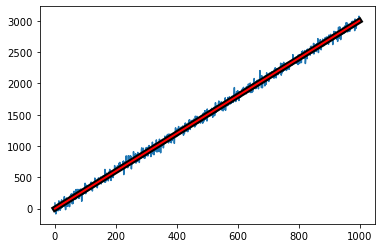

[3.00195418]


In [17]:
y_calc = X[0]*x #Calculated y values with coefficient found
plt.plot(x,y_noise)
plt.plot(x,y,color = "black", linewidth = 6) #Original equation y = 3x
plt.plot(x,y_calc, color = "red", linewidth = 2) #Calculated equation 
plt.show()
print(X)

#### The black line shows our key, and the red line shows our calculated line of best fit.   
#### Using the formula, the estimated $\beta$ = 2.99985693, which is pretty close to our answer!   


## Moving on, let's try to use the same method to estimate line $y = 3x + 1000$

(0.0, 1000.0)

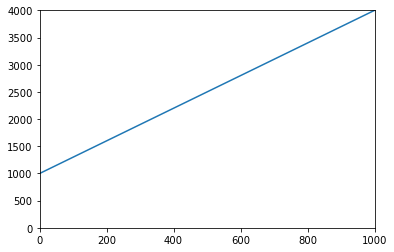

In [18]:
y = 1000 + 3*x
plt.plot(x,y)
plt.ylim([0,4000])
plt.xlim([0,1000])

#### Now generate random points around that line:   

In [19]:
mean = 0
std_deviation = 50
noise = np.random.normal(mean, std_deviation, N)

(0.0, 1000.0)

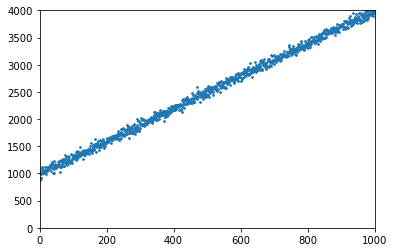

In [20]:
y_noise = y+noise
plt.scatter(x,y_noise,s = 3)
plt.ylim([0,4000])
plt.xlim([0,1000])

#### Now let's try to estimate the line of best fit using the exact same method 

In [21]:
b = y_noise
A = np.zeros((1000,1))
A[:,0] = x

In [22]:
AT = np.transpose(A) # A transpose
ATA_inverse = np.linalg.inv(np.dot(AT,A)) # Inverse of ATA
ATb = np.dot(AT,b) #ATb
X = np.dot(ATA_inverse, ATb)

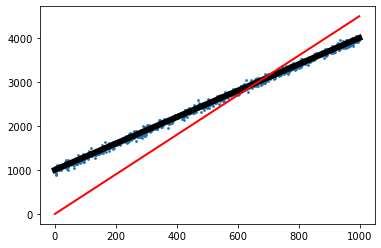

[4.4950344]


In [23]:
y_calc = X[0]*x #Calculated y values with coefficient found
plt.scatter(x,y_noise, s=3)
plt.plot(x,y,color = "black", linewidth = 6) #Original equation y = 3x
plt.plot(x,y_calc, color = "red", linewidth = 2) #Calculated equation 
plt.show()
print(X)

#### Hmmm... our line of best fit not the best. Why is that?
##### In our calculation, we defined A to be an $N\times1$ matrix, where there is just one column of all our x values. This results in an X that is $1\times1$, meaning we get an output of only one unknown. 
##### For the case of $y = 3x$ this worked perfectly well because it was the format $y = \beta x$, and we only had one unknown $\beta$. 
##### But now with $y = 3x + 1000$, we have this intercept part that is just ignored, and we restrict ourselves to only fitting lines that go through the origin. The best we can do is fit $y = 4.5x$. 

### How do we account for intercept?
##### Well, if we want to calculate both the x coefficient and the y-intercept, we're following the form
$y = \beta_0 + \beta_1 x$ 
##### That means we want an $X$ that is $2\times1$, with the elements $\beta_0$ and $\beta_1$. 
##### For that to be possible, we must make A an $N\times2$ matrix. We can do this by adding another column of all 1's. By including that column of 1's in our matrix A, we allow our line to move up and down the y-axis.  

##### To understand why this works, consider we have multiple data points $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$. 
##### The matrix form representation for these points in terms of $AX = b$ is 
$\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\
x_n & 1 \\
\end{bmatrix}\begin{bmatrix}
\beta_1 \\
\beta_0 \\
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}$

##### For each row, we can see that the y-value is computed as $\beta_1 \times x_i + \beta_0 \times 1$, the same as $y_i = \beta_0 + \beta_1 x_i$ 


## Re-calculate best fit for $y = 3x+1000$

In [24]:
b = y_noise
A = np.zeros((1000,2))
A[:,0] = x; A[:,1] = 1

In [25]:
AT = np.transpose(A)
ATA_inverse = np.linalg.inv(np.dot(AT,A))
ATb = np.dot(AT,b)
X = np.dot(ATA_inverse, ATb)

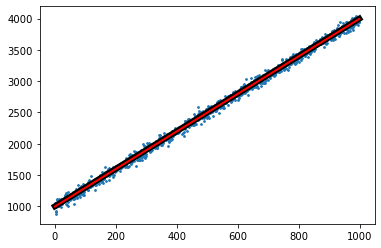

[  3.0001581  996.08590732]


In [26]:
y_calc = X[0]*x+X[1]
plt.scatter(x,y_noise,s=3)
plt.plot(x,y,color = "black", linewidth = 6)
plt.plot(x,y_calc, color = "red", linewidth = 2)
plt.show()
print(X)

#### Wow! That looks a *lot* better than the last line. Now we have a line of best fit! 